# Линейные модели, SVM и деревья решений

Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

## Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    1. одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    2. SVM;
    3. дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

## Ход работы

### Выбор и загрузка датасета

In [1]:
# %matplotlib inline
# sns.set(style="ticks")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from operator import itemgetter

def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

wine = load_wine()

df = make_dataframe(load_wine)

In [2]:
# Первые 5 строк датасета
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [4]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


### Разделение на тестовую и обучающую выборки

In [5]:
y = df['target']
x = df.drop('target', axis = 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.4, random_state = 0)

print(f"Обучающая выборка:\n{x_train, y_train}")
print(f"Тестовая выборка:\n{x_test, y_test}")

Обучающая выборка:
(array([[0.58157895, 0.64031621, 0.4973262 , ..., 0.27642276, 0.63369963,
        0.28673324],
       [0.80789474, 0.28063241, 0.5026738 , ..., 0.62601626, 0.6959707 ,
        0.87874465],
       [0.15263158, 0.12055336, 0.71657754, ..., 0.3902439 , 0.72893773,
        0.28673324],
       ...,
       [0.36578947, 0.17193676, 0.44385027, ..., 0.47154472, 0.61904762,
        0.04778887],
       [0.75526316, 0.18577075, 0.40641711, ..., 0.3495935 , 0.75457875,
        0.5042796 ],
       [0.82368421, 0.34980237, 0.59893048, ..., 0.11382114, 0.16117216,
        0.2724679 ]]), 43     0.0
10     0.0
109    1.0
73     1.0
171    2.0
      ... 
103    1.0
67     1.0
117    1.0
47     0.0
172    2.0
Name: target, Length: 106, dtype: float64)
Тестовая выборка:
(array([[0.71315789, 0.18379447, 0.47593583, 0.29896907, 0.52173913,
        0.55862069, 0.54008439, 0.1509434 , 0.38170347, 0.38993174,
        0.35772358, 0.70695971, 0.55777461],
       [0.46315789, 0.38142292, 0.5989

### Логическая регрессия

In [6]:
lr = LogisticRegression(random_state=0)
lr_prediction = lr.fit(x_train, y_train).predict(x_test)

### SVM

In [7]:
svc = svm.SVC(random_state=0)
svc_prediction = svc.fit(x_train, y_train).predict(x_test)

### Дерево решений

In [8]:
dt = DecisionTreeClassifier(random_state=0)
dt_prediction = dt.fit(x_train, y_train).predict(x_test)

### Оценка качества решений

In [9]:
print("Logistic regression: ", accuracy_score(y_test, lr_prediction))
print("SVM: ", accuracy_score(y_test, svc_prediction))
print("Decision tree: ", accuracy_score(y_test, dt_prediction))

Logistic regression:  0.9583333333333334
SVM:  0.9722222222222222
Decision tree:  0.9166666666666666


Logistic regression:  0.9583333333333334


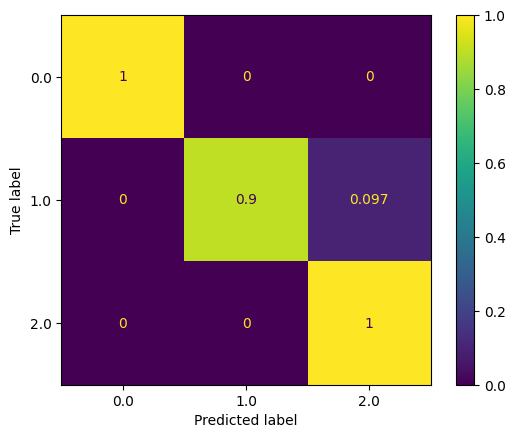

In [10]:
print("Logistic regression: ", accuracy_score(y_test, lr_prediction))

cm = confusion_matrix(y_test, lr_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

SVM:  0.9722222222222222


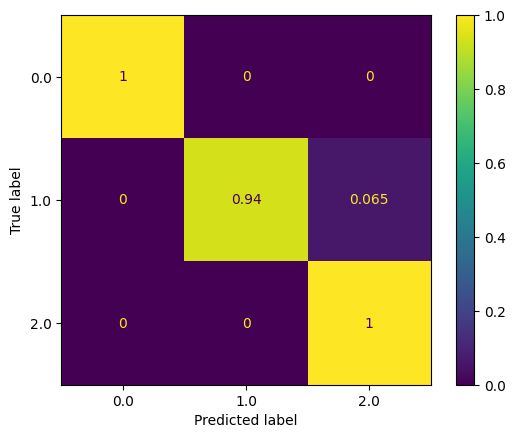

In [11]:
print("SVM: ", accuracy_score(y_test, svc_prediction))

cm = confusion_matrix(y_test, svc_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Decision tree:  0.9166666666666666


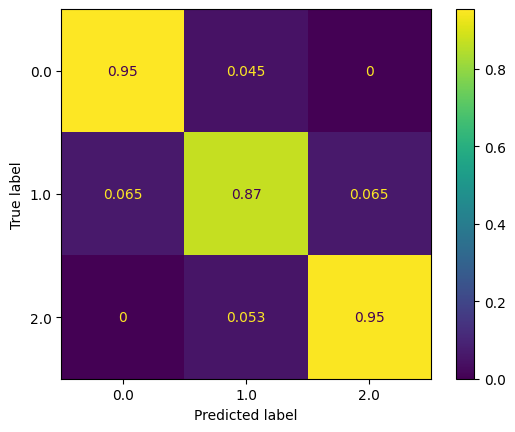

In [12]:
print("Decision tree: ", accuracy_score(y_test, dt_prediction))

cm = confusion_matrix(y_test, dt_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

### Важность признаков

In [13]:
list(zip(x.columns.values, dt.feature_importances_))

[('alcohol', 0.013502594973104024),
 ('malic_acid', 0.014274171828709938),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.053018352506636925),
 ('magnesium', 0.0),
 ('total_phenols', 0.019032229104946584),
 ('flavanoids', 0.0858859795341857),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.02777676680181396),
 ('od280/od315_of_diluted_wines', 0.36405154845343657),
 ('proline', 0.4224583567971662)]

In [14]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    # Sorting the values of the importance of features in descending order
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Features names
    labels = [x for x,_ in sorted_list]
    # Features importance
    data = [x for _,x in sorted_list]
    # Graph output
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Values output
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

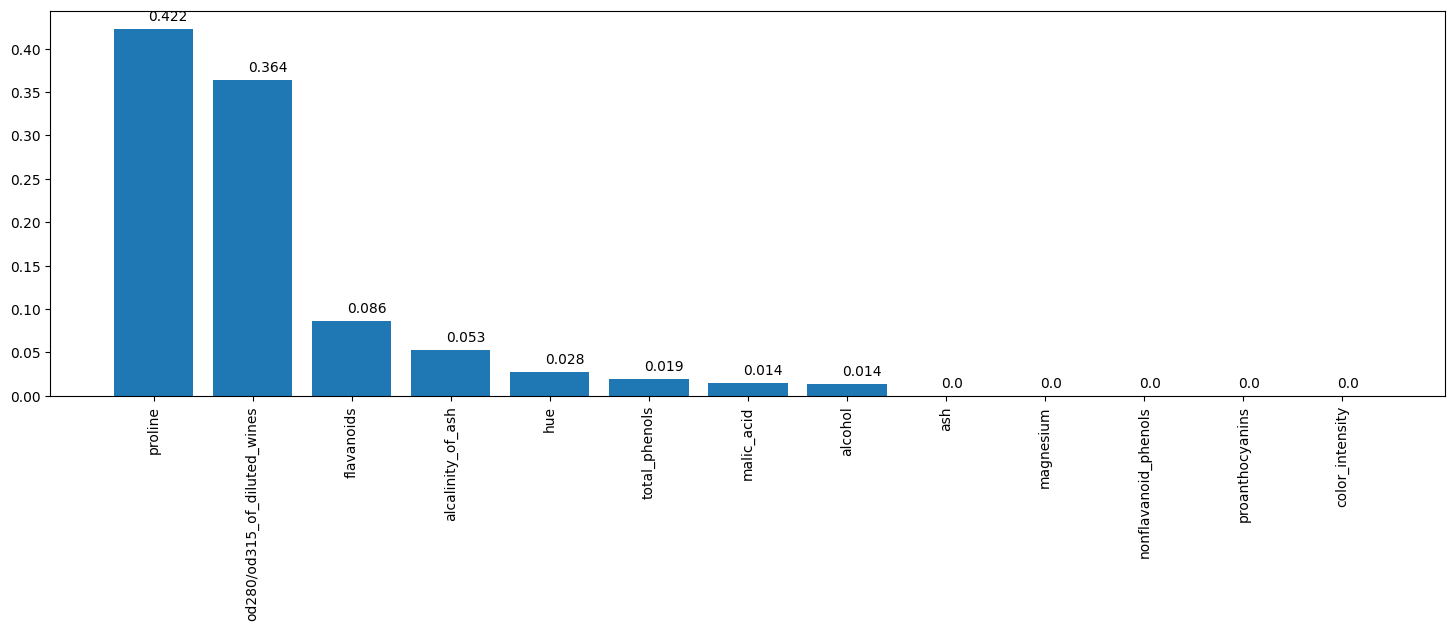

In [15]:
dt_fl, dt_fd = draw_feature_importances(dt, x)

### Визуализация дерева решений

[Text(0.5, 0.9166666666666666, 'x[12] <= 0.34\ngini = 0.661\nsamples = 106\nvalue = [37, 40, 29]'),
 Text(0.25, 0.75, 'x[11] <= 0.337\ngini = 0.501\nsamples = 66\nvalue = [1, 38, 27]'),
 Text(0.125, 0.5833333333333334, 'x[3] <= 0.356\ngini = 0.133\nsamples = 28\nvalue = [0, 2, 26]'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.1875, 0.4166666666666667, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]'),
 Text(0.375, 0.5833333333333334, 'x[6] <= 0.113\ngini = 0.101\nsamples = 38\nvalue = [1, 36, 1]'),
 Text(0.3125, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4375, 0.4166666666666667, 'x[0] <= 0.554\ngini = 0.053\nsamples = 37\nvalue = [1, 36, 0]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.5, 0.25, 'x[1] <= 0.411\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.4375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5625, 0.08333333333333333, 'gini =

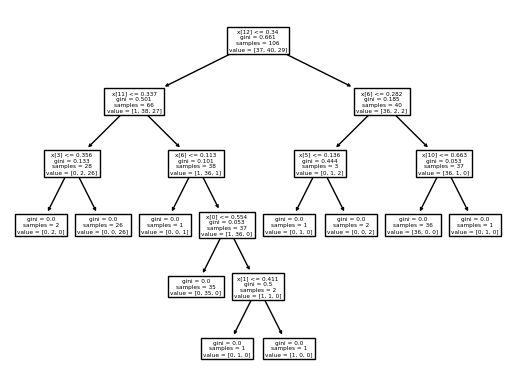

In [16]:
tree.plot_tree(dt) 